In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/kobalaji/Desktop/LetsUpgrade AI-ML/Ensemble Learning/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.0+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [6]:
df

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
cols = ['Name', 'PassengerId','Ticket','Age','Cabin','Fare']

In [9]:
df.drop(columns=cols,inplace=True)

In [10]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,S
1,1,1,0,1,0,C
2,1,3,0,0,0,S
3,1,1,0,1,0,S
4,0,3,1,0,0,S
...,...,...,...,...,...,...
884,0,2,1,0,0,S
885,1,1,0,0,0,S
886,0,3,0,1,2,S
887,1,1,1,0,0,C


In [11]:
df['Embarked'] = lb.fit_transform(df.Embarked)

In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,2
1,1,1,0,1,0,0
2,1,3,0,0,0,2
3,1,1,0,1,0,2
4,0,3,1,0,0,2


In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [14]:
df.isna().sum().sum()

0

In [15]:
from sklearn import tree

In [16]:
DeTreeClass = tree.DecisionTreeClassifier()

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [18]:
x = df.iloc[:,1:]
#x = df[['Sex','Parch','Pclass']]

In [19]:
x.head(10)

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2
5,3,1,0,0,1
6,1,1,0,0,2
7,3,1,3,1,2
8,3,0,0,2,2
9,2,0,1,0,0


In [20]:
y = df.Survived

In [21]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=1)

In [24]:
print(x_train.shape)
print(x_test.shape)

(711, 5)
(178, 5)


In [25]:
print(y_train.shape)
print(y_test.shape)

(711,)
(178,)


In [26]:
DeTreeClass.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
DeTreeClass.score(x_test,y_test)

0.7921348314606742

In [28]:
DeTreeClass.score(x_train,y_train)

0.8354430379746836

# RandomForestClassfier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=10)

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rf.feature_importances_

array([0.23188984, 0.46074122, 0.10668685, 0.11022582, 0.09045627])

In [33]:
feature_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

Sex         0.460741
Pclass      0.231890
Parch       0.110226
SibSp       0.106687
Embarked    0.090456
dtype: float64

In [34]:
rf.score(x_train,y_train)

0.8326300984528833

In [35]:
rf.score(x_test,y_test)

0.8146067415730337

# Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bg = BaggingClassifier(DeTreeClass,max_samples=0.50,max_features=1.0,n_estimators=20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [38]:
bg.score(x_train,y_train)

0.8270042194092827

In [39]:
bg.score(x_test,y_test)

0.8202247191011236

# Boosting


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada = AdaBoostClassifier(DeTreeClass,n_estimators=20,learning_rate=1.0)


In [42]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [43]:
ada.score(x_train,y_train)

0.8354430379746836

In [44]:
ada.score(x_test,y_test)

0.8033707865168539

In [45]:
print("Dmodel:",DeTreeClass.score(x_train,y_train))
print("Ada:",ada.score(x_train,y_train))
print("Bagging:",bg.score(x_train,y_train))
print("RandomForestClassifier:",rf.score(x_train,y_train))

Dmodel: 0.8354430379746836
Ada: 0.8354430379746836
Bagging: 0.8270042194092827
RandomForestClassifier: 0.8326300984528833


In [46]:
print("Dmodel:",DeTreeClass.score(x_test,y_test))
print("Ada:",ada.score(x_test,y_test))
print("Bagging:",bg.score(x_test,y_test))
print("RandomForestClassifier:",rf.score(x_test,y_test))

Dmodel: 0.7921348314606742
Ada: 0.8033707865168539
Bagging: 0.8202247191011236
RandomForestClassifier: 0.8146067415730337


# Voting

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [48]:
lr =LogisticRegression()
dt = DecisionTreeClassifier()
svm =SVC()
nb  = GaussianNB()
knn = KNeighborsClassifier()
#svm = SVC(kernel='linear',degree=2)

In [49]:
evc =VotingClassifier(estimators=[('lr',lr),('dt',dt),('svm',svm),('Naive Bayes',nb),('knn',knn)],voting='hard')

In [50]:
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                  gamma=

In [51]:
Y_Pred = evc.predict(x_test)

In [52]:
evc.score(x_train,y_train)

0.8087201125175809

In [53]:
evc.score(x_test,y_test)

0.8426966292134831

In [54]:
#x_test['Predicted'] = Y_Pred

In [55]:
#x_test['Actual'] = pd.DataFrame(y_test)

In [56]:
#x_test

In [57]:
#Notmatched = x_test[x_test['Predicted'] != x_test['Actual']]

In [58]:
#Notmatched.head(10)

In [59]:
#Notmatched.count()

In [60]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,accuracy_score

In [61]:
classification_report(y_test,Y_Pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87       105\n           1       0.85      0.75      0.80        73\n\n    accuracy                           0.84       178\n   macro avg       0.84      0.83      0.83       178\nweighted avg       0.84      0.84      0.84       178\n'

In [62]:
confusion_matrix(y_test,Y_Pred)

array([[95, 10],
       [18, 55]], dtype=int64)

In [63]:
recall_score(y_test,Y_Pred)

0.7534246575342466

In [64]:
accuracy_score(y_test,Y_Pred, normalize=True)

0.8426966292134831

In [65]:
for features, imp in zip(x.columns, rf.feature_importances_):
    print(features, imp)

Pclass 0.23188983962562534
Sex 0.4607412218579376
SibSp 0.106686848958783
Parch 0.11022582301272014
Embarked 0.09045626654493394


#  Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [68]:
bgc = BaggingClassifier()

In [69]:
bgc

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [70]:
rfc = RandomForestClassifier()

In [71]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Boosting

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada = AdaBoostClassifier()

In [74]:
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)

In [98]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [100]:
knn.score(x_train,y_train)

0.8227848101265823

In [101]:
knn_YPred = knn.predict(x_test)

In [102]:
knn.score(x_test,y_test)

0.8033707865168539

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test,knn_YPred,normalize=True)

0.8033707865168539

In [105]:
ada = AdaBoostClassifier()

In [106]:
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [109]:
ada = AdaBoostClassifier(n_estimators=10)

In [110]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [111]:
y_pred_ada = ada.predict(x_test)

In [112]:
ada.score(x_train,y_train)

0.7876230661040787

In [113]:
accuracy_score(y_test,y_pred_ada)

0.8258426966292135

In [114]:
x.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2


In [116]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [117]:
import seaborn as sns

<AxesSubplot:xlabel='Survived'>

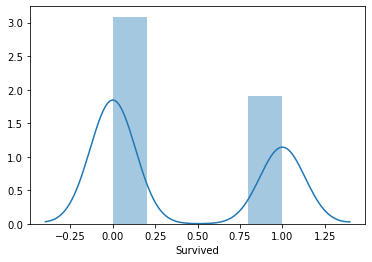

In [119]:
sns.distplot(df['Survived'])

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
gbc = GradientBoostingClassifier()

In [122]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)